# **DATA 603 FACIAL EMOTIONS RECOGNITION PROJECT**

In [ ]:
import os
import pandas as pd

def count_classes(path, name):
    classes_dict = {class_name: len(os.listdir(os.path.join(path, class_name))) for class_name in os.listdir(path)}
    df = pd.DataFrame(classes_dict, index=[name]).transpose().sort_values(by=name, ascending=False)
    return df

train_dir ='/content/drive/MyDrive/DATA 603/TRAIN'
test_dir = '/content/drive/MyDrive/DATA 603/TEST'

train_count = count_classes(train_dir, 'Train')
test_count = count_classes(test_dir, 'Test')

print(train_count)
print(test_count)


          Train
happy      7215
neutral    4965
sad        4830
fear       4097
angry      3995
surprise   3181
disgust     436
          Test
happy     1774
sad       1247
neutral   1243
fear      1024
angry      958
surprise   831
disgust    111


We employed a function called count_classes, which counts the number of files in each subdirectory of the given path after receiving a directory path and a name as input. The outcomes are arranged into a Pandas DataFrame, which is sorted in decreasing order according to the counts. The column names in the DataFrame are generated from the supplied name parameter. The function is then applied to two directories, one for training ('/content/drive/MyDrive/DATA 603/TRAIN') and the other for testing ('/content/drive/MyDrive/DATA 603/TEST'). The generated DataFrames are printed to show the counts of files in each class for both datasets. A brief summary of the distribution of data among the various classes in the training and testing sets is probably the goal.

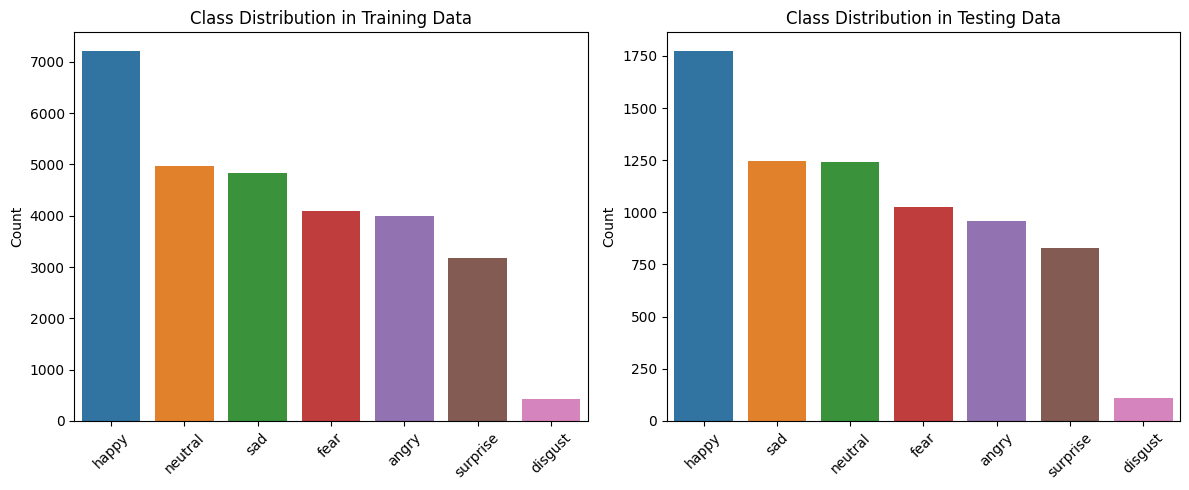

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up two subplots (one for training and one for testing)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting class distribution for the training dataset
sns.barplot(x=train_count.index, y='Train', data=train_count, ax=axes[0])
axes[0].set_title('Class Distribution in Training Data')
axes[0].set_ylabel('Count')

# Plotting class distribution for the testing dataset
sns.barplot(x=test_count.index, y='Test', data=test_count, ax=axes[1])
axes[1].set_title('Class Distribution in Testing Data')
axes[1].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The distribution of classes in a dataset, separated into "Training Data" and "Testing Data," is shown in the above two bar charts. Every bar graph displays the number of occurrences for the various classes, each of which is associated with one of the following emotions: "happy," "neutral," "sad," "fear," "angry," "surprise," and "disgust." 'Happy' has the highest count in both charts, while 'disgust' has the lowest. While the testing data chart has fewer instances, which is expected as testing datasets are often smaller to check the model's performance on unknown data, the training data chart displays a significantly greater count for each class, suggesting a larger dataset used for training a model. Comparing the class distribution across the training and testing sets is made easier by the colors being the same in both charts.

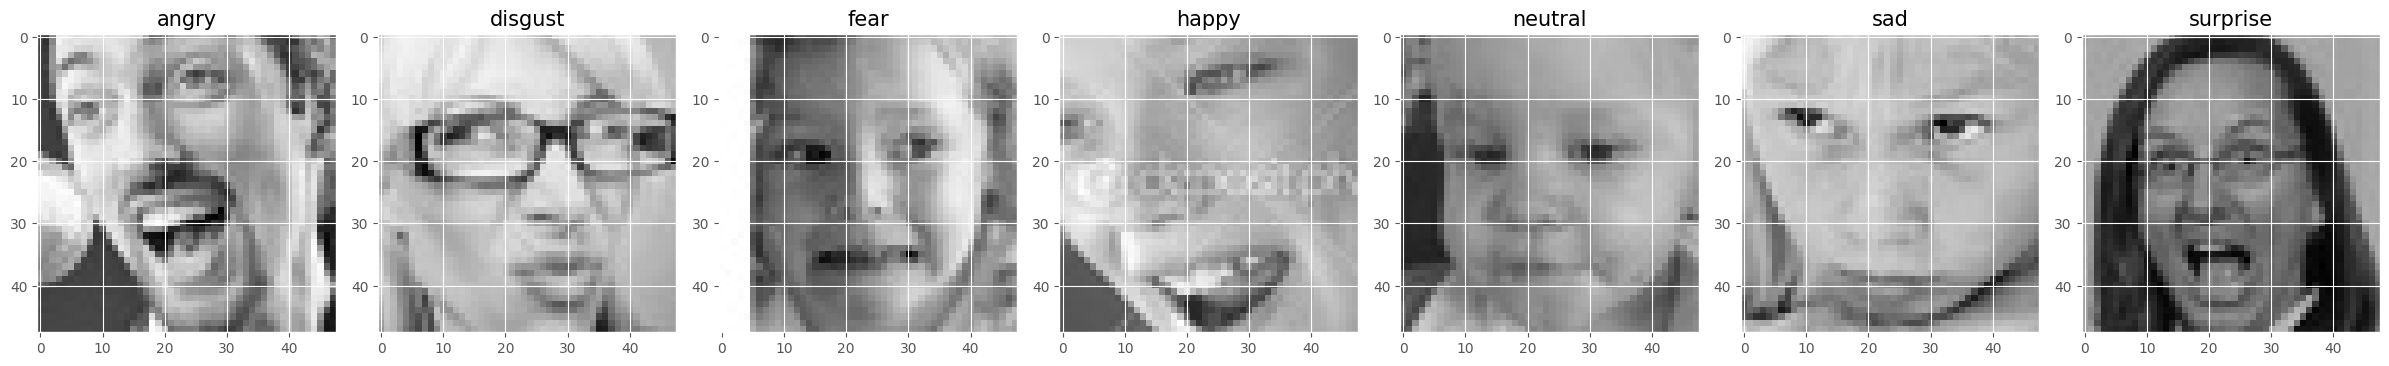

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Setting up the style and size of the plot
plt.style.use('ggplot')
plt.figure(figsize=(24, 10))

# Counter for the number of images displayed
num_images_displayed = 0

# Path to the directory containing image folders
IMAGE_DIR = '/content/drive/MyDrive/DATA 603/TRAIN'

# Creating a list of directory names, excluding hidden files or directories
dir_names = [dir for dir in os.listdir(IMAGE_DIR) if not dir.startswith('.')]

# Initializing an iterator for the directory list
dir_iterator = iter(dir_names)
while num_images_displayed < 7:
    try:
        # Getting the next directory
        current_dir = next(dir_iterator)
    except StopIteration:
        break  # Break the loop if there are no more directories

    # Path to the first image in the current directory
    first_image_path = os.path.join(IMAGE_DIR, current_dir, os.listdir(os.path.join(IMAGE_DIR, current_dir))[0])

    # Loading and displaying the image
    image = cv2.imread(first_image_path)
    plt.subplot(1, 7, num_images_displayed + 1)
    plt.imshow(image)
    plt.title(current_dir, fontsize=15)

    # Incrementing the image counter
    num_images_displayed += 1
plt.tight_layout()
plt.show()


Within a given parent directory ('/content/drive/MyDrive/DATA 603/TRAIN,' for example), we visualized a selection of photos from several folders using the OpenCV (cv2) and Matplotlib packages. The code displays the first image from each directory in a subplot, iterates through non-hidden directories within the parent directory, and sets the plot style and size. Until seven photos are shown or there are no more directories, the while loop keeps running. The first image from the current directory is loaded for each iteration, added to the plot, and the directory name is labeled on the subplot. The resulting graphic gives a brief summary of the content and organization of the dataset by visualizing the original photos in a selection of directories.

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=3b360f4a163518f43e05cdb83b86ce866cdf4829a28a674c3a663156a6fce8c7
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
from pyspark.sql.types import ArrayType, FloatType
from pyspark.sql.functions import udf
import cv2
import numpy as np

In [ ]:
from pyspark.sql import SparkSession

# Initializing Spark session
spark = SparkSession.builder.appName("ImageCount").getOrCreate()

def load_images(folder_path):
    return spark.read.format("binaryFile").load(folder_path)

# Paths to train subfolders
train_folders = [
    "/content/drive/MyDrive/DATA 603/TRAIN/angry",
    "/content/drive/MyDrive/DATA 603/TRAIN/disgust",
    "/content/drive/MyDrive/DATA 603/TRAIN/fear",
    "/content/drive/MyDrive/DATA 603/TRAIN/happy",
    "/content/drive/MyDrive/DATA 603/TRAIN/neutral",
    "/content/drive/MyDrive/DATA 603/TRAIN/sad",
    "/content/drive/MyDrive/DATA 603/TRAIN/surprise"
]

# Paths to test subfolders
test_folders = [
    "/content/drive/MyDrive/DATA 603/TEST/angry",
    "/content/drive/MyDrive/DATA 603/TEST/disgust",
    "/content/drive/MyDrive/DATA 603/TEST/fear",
    "/content/drive/MyDrive/DATA 603/TEST/happy",
    "/content/drive/MyDrive/DATA 603/TEST/neutral",
    "/content/drive/MyDrive/DATA 603/TEST/sad",
    "/content/drive/MyDrive/DATA 603/TEST/surprise"
]

# Loading datasets for each category in training
train_dfs = [load_images(folder_path) for folder_path in train_folders]

# Counting the number of images in each training subfolder
num_train_images = [train_df.count() for train_df in train_dfs]

# Calculating total number of images in the training folder
total_train_images = sum(num_train_images)

# Displaying the counts for training
for i, folder_path in enumerate(train_folders):
    print(f"Number of images in {folder_path}: {num_train_images[i]}")

print(f"Total number of images in training folder: {total_train_images}")

# Loading datasets for each subfolder in testing
test_dfs = [load_images(folder_path) for folder_path in test_folders]

# Counting the number of images in each testing subfolder
num_test_images = [test_df.count() for test_df in test_dfs]

# Calculating total number of images in the testing folder
total_test_images = sum(num_test_images)

# Displaying the counts for testing
for i, folder_path in enumerate(test_folders):
    print(f"Number of images in {folder_path}: {num_test_images[i]}")

print(f"Total number of images in testing folder: {total_test_images}")

# Stop the Spark session
spark.stop()


Number of images in /content/drive/MyDrive/DATA 603/TRAIN/angry: 3995
Number of images in /content/drive/MyDrive/DATA 603/TRAIN/disgust: 436
Number of images in /content/drive/MyDrive/DATA 603/TRAIN/fear: 4097
Number of images in /content/drive/MyDrive/DATA 603/TRAIN/happy: 7215
Number of images in /content/drive/MyDrive/DATA 603/TRAIN/neutral: 4965
Number of images in /content/drive/MyDrive/DATA 603/TRAIN/sad: 4830
Number of images in /content/drive/MyDrive/DATA 603/TRAIN/surprise: 3181
Total number of images in training folder: 28719
Number of images in /content/drive/MyDrive/DATA 603/TEST/angry: 958
Number of images in /content/drive/MyDrive/DATA 603/TEST/disgust: 111
Number of images in /content/drive/MyDrive/DATA 603/TEST/fear: 1024
Number of images in /content/drive/MyDrive/DATA 603/TEST/happy: 1774
Number of images in /content/drive/MyDrive/DATA 603/TEST/neutral: 1243
Number of images in /content/drive/MyDrive/DATA 603/TEST/sad: 1247
Number of images in /content/drive/MyDrive/DA

Large-scale image collections could be processed distributedly because to our use of the PySpark module for Apache Spark. With the name "ImageCount," the Spark session is started, and the load_images function effectively reads image files from given locations by utilizing Spark's "binaryFile" format. In order to enable parallelized data processing, distinct Spark DataFrames are constructed for each emotion category in the training and testing datasets. The script counts the number of photographs in each subfolder by utilizing Spark's distributed computing capabilities, which sheds light on the dispersion of the dataset. The script counts the total number of photographs in the training and testing sets and prints the result, providing an overview of the counts of images in each subfolder. In order to guarantee effective resource management, the Spark session is finally terminated. This method improves the efficiency and scalability of processing image datasets, which is especially useful when managing big datasets in distributed computing settings.

In [ ]:
import os
import numpy as np
import cv2
from pyspark.sql import SparkSession

def initialize_spark():
    return SparkSession.builder \
        .appName("ImageEnhancementWithSpark") \
        .getOrCreate()

def enhanced_save_image(input_path, output_path):
    facial_image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    if facial_image is not None:
        min_val = np.percentile(facial_image, 5)
        max_val = np.percentile(facial_image, 95)
        updated_enhanced_image = np.clip((facial_image - min_val) * 255 / (max_val - min_val), 0, 255).astype(np.uint8)
        cv2.imwrite(output_path, updated_enhanced_image)

def process_emotion_folder(emotion, input_folder, output_folder, spark):
    input_emotion_path = os.path.join(input_folder, emotion)
    output_emotion_path = os.path.join(output_folder, emotion)

    if os.path.isdir(input_emotion_path):
        # Creating corresponding output folder all emotions
        os.makedirs(output_emotion_path, exist_ok=True)

        # Processing the all images in input folder
        image_paths = [os.path.join(input_emotion_path, filename) for filename in os.listdir(input_emotion_path) if filename.endswith('.jpg')]

        for input_image_path in image_paths:
            # Constructing  the respective  output image path, which has same structure as input image folder
            output_image_path = os.path.join(output_emotion_path, os.path.basename(input_image_path))

            # Enhancing is done and saved the images in the respective output folder
            enhanced_save_image(input_image_path, output_image_path)
        num_enhanced_images = len(image_paths)
        print(f"Enhanced {num_enhanced_images} images for emotion: {emotion}")

        # Indicating that enhancement is completed in each folder
        print(f"Image enhancement has been completed for the emotion: {emotion}. Enhanced {num_enhanced_images} images.")

def main():
    spark = initialize_spark()

    input_parent_directory = "/content/drive/MyDrive/DATA 603/TRAIN"
    output_parent_directory = "/content/drive/MyDrive/DATA 603/ENHANCED_TRAIN"

    os.makedirs(output_parent_directory, exist_ok=True)

    for emotion in os.listdir(input_parent_directory):
        process_emotion_folder(emotion, input_parent_directory, output_parent_directory, spark)

    print("Image enhancement has been completed on all folders.")
    spark.stop()

if __name__ == "__main__":
    main()


<ipython-input-2-13f9c4e6ccaf>:16: RuntimeWarning: invalid value encountered in divide
  updated_enhanced_image = np.clip((facial_image - min_val) * 255 / (max_val - min_val), 0, 255).astype(np.uint8)


Enhanced 3995 images for emotion: angry
Image enhancement has been completed for the emotion: angry. Enhanced 3995 images.
Enhanced 436 images for emotion: disgust
Image enhancement has been completed for the emotion: disgust. Enhanced 436 images.
Enhanced 4097 images for emotion: fear
Image enhancement has been completed for the emotion: fear. Enhanced 4097 images.
Enhanced 7215 images for emotion: happy
Image enhancement has been completed for the emotion: happy. Enhanced 7215 images.
Enhanced 4965 images for emotion: neutral
Image enhancement has been completed for the emotion: neutral. Enhanced 4965 images.
Enhanced 4830 images for emotion: sad
Image enhancement has been completed for the emotion: sad. Enhanced 4830 images.
Enhanced 3181 images for emotion: surprise
Image enhancement has been completed for the emotion: surprise. Enhanced 3181 images.
Image enhancement has been completed on all folders.


Image enhancement has been applied on the  facial images in the dataset using Apache Spark for distributed computing. The script starts by initializing a Spark session named "ImageEnhancementWithSpark" using the initialize_spark function. The core enhancement function, enhanced_save_image, reads grayscale facial images from the input path, adjusts pixel values to enhance contrast, and then saves the enhanced image to the specified output path. The enhancement is achieved by computing percentiles of pixel values and scaling them to the full intensity range. The script then defines a function, process_emotion_folder, to process all images in a specified emotion folder, applying the enhancement function to each image. The main function iterates through each emotion folder in the training dataset, processes and enhances the images, and stores the enhanced images in a new directory. Finally, the Spark session is stopped, and the completion message is printed.

With Spark, this code makes it easier to enhance facial photos in a distributed fashion. This is especially helpful for large-scale datasets. It preserves the existing folder hierarchy while organizing the improved photos into a new directory structure. When Spark is used, parallel processing is made possible, which improves the effectiveness of picture improvement jobs for several emotion categories at once. The script shows how to process images in a scalable and distributed manner, making it ideal for managing large datasets in a distributed computing or cloud context.

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def init_datagen():
    return ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

def save_augmented_images(input_path, output_path, datagen, num_augmented=5):
    try:
        img = tf.keras.preprocessing.image.load_img(input_path, target_size=(48, 48))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Create a flow iterator which saves images to 'output_path'
        augmented_images = datagen.flow(img_array, batch_size=1, save_to_dir=output_path, save_prefix='aug', save_format='jpg')

        # Generate 'num_augmented' augmented images
        for _ in range(num_augmented):
            augmented_images.next()
    except Exception as e:
        print(f"Error processing image {input_path}: {e}")

def processing_emotions_all_folder(emotion, input_folder, output_folder, datagen, num_augmented=5):
    input_emotion_path = os.path.join(input_folder, emotion)
    output_emotion_path = os.path.join(output_folder, emotion)

    if os.path.isdir(input_emotion_path):
        os.makedirs(output_emotion_path, exist_ok=True)

        image_files = [os.path.join(input_emotion_path, filename) for filename in os.listdir(input_emotion_path) if os.path.splitext(filename)[1].lower() == '.jpg']

        for input_image_path in image_files:
            save_augmented_images(input_image_path, output_emotion_path, datagen, num_augmented)

        print(f"Data augmentation complete for emotion: {emotion}. Processed {len(image_files)} original images. Augmented images: {num_augmented * len(image_files)}")
    else:
        print(f"Input directory does not exist: {input_emotion_path}")

def main():
    input_parent_directory = "/content/drive/MyDrive/DATA 603/ENHANCED_TRAIN"
    output_parent_directory = "/content/drive/MyDrive/DATA 603/AUGMENTATED_TRAIN"

    os.makedirs(output_parent_directory, exist_ok=True)

    datagen = init_datagen()

    for emotion in os.listdir(input_parent_directory):
        processing_emotions_all_folder(emotion, input_parent_directory, output_parent_directory, datagen)

    print("Data augmentation has been completed on all folders.")

if __name__ == "__main__":
    main()


Data augmentation complete for emotion: angry. Processed 3995 original images. Augmented images: 19975
Data augmentation complete for emotion: disgust. Processed 436 original images. Augmented images: 2180
Data augmentation complete for emotion: fear. Processed 4097 original images. Augmented images: 20485
Data augmentation complete for emotion: happy. Processed 7215 original images. Augmented images: 36075
Data augmentation complete for emotion: neutral. Processed 4965 original images. Augmented images: 24825
Data augmentation complete for emotion: sad. Processed 4830 original images. Augmented images: 24150
Data augmentation complete for emotion: surprise. Processed 3181 original images. Augmented images: 15905
Data augmentation has been completed on all folders.


We applied data augmentation to facial image using TensorFlow. It loads a generator of image data with predefined augmentation methods, like rotation, shifting, and flipping. The save_augmented_images function uses the initialized data generator to create a user-defined number of enhanced images after loading input images and converting them to arrays. The processing_emotions_all_folder function, which analyzes all photographs in emotion-specific folders, applies data augmentation, and saves the augmented images to an output directory, encapsulates the primary functionality. The script arranges the augmentation procedure, builds a new directory structure for the enhanced photographs, and loops through the emotion folders in the input parent directory. In general, it enhances the diversity of the training dataset for better machine learning model training and performance by automating the augmentation of facial photos.

In [ ]:
# Load the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import os
import tensorflow as tf
import keras
import cv2

# Load libraries for data preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Load libraries for building CNN
from tensorflow.keras.layers import *
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential, Model

# Load libraries for ResNet transfer learning
from tensorflow.keras.applications import ResNet50V2

# Load libraries for callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

def custom_facial_CNN_Model(input_shape=(48, 48, 3)):
    model = Sequential()

    # CNN1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    # CNN2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    # Output
    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(7, activation='softmax'))

    return model


We defined a convolutional neural network (CNN) model for facial expression recognition using TensorFlow's Keras API. The custom_facial_CNN_Model function initializes a Sequential model and adds layers for feature extraction and classification. The architecture consists of two convolutional layers (CNN1 and CNN2) with max-pooling, batch normalization, and dropout for regularization to prevent overfitting. The output from the convolutional layers is flattened, followed by a series of densely connected layers with batch normalization and dropout for further feature transformation. The final layer comprises seven nodes with softmax activation for classifying facial expressions into one of seven categories (e.g., happy, sad, angry). This model is designed to learn hierarchical features from facial images and make predictions for different emotion classes. It follows common practices in CNN architecture, incorporating batch normalization and dropout for improved generalization performance during training.

In [ ]:
# Define input and output directories
input_parent_directory = "/content/drive/MyDrive/DATA 603/AUGMENTATED_TRAIN"
output_directory = "/content/drive/MyDrive/DATA 603/model_output/final_model"

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Define constants
input_shape = (48, 48, 3)
num_classes = len(os.listdir(input_parent_directory))

# Data augmentation configuration for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data generator for training set
train_generator = train_datagen.flow_from_directory(
    input_parent_directory,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=128,
    class_mode='categorical'
)


Found 55309 images belonging to 7 classes.


A deep learning model has been trained on enhanced face expression photos using a data generator. The input and output directories for the enhanced training data as well as the location to save the model output are defined first. The code uses os.makedirs to generate the output directory if it doesn't already exist. Next, the script defines certain constants: the number of classes, which is the number of subdirectories in the input parent directory; and the shape of the input image, which is 48x48 pixels with three color channels.

The data generator is set up to flip horizontally, apply shear and zoom transformations, and rescale pixel values to a range of 0 to 1. Then, using flow_from_directory, a data generator for the training set is produced. After resizing the images to the desired size, this generator reads the images from the designated input parent directory and groups them into sets of 128 images. The labels are supplied in a categorical format, making the generator appropriate for multi-class classification issues when it is configured to operate in categorical class mode. In order to effectively input enriched training data into a deep learning model and improve the model's capacity to generalize from a variety of examples during training, this configuration is essential.

In [ ]:
# Creating and compiling the model
model = custom_facial_CNN_Model(input_shape=(input_shape[0], input_shape[1], 3))
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
try:
    history = model.fit(train_generator, epochs=85)
except Exception as e:
    print(f"Error during training: {e}")

# Saving the trained model with .h5 extension
model.save(os.path.join(output_directory, 'trained_facial_expression_model.h5'))

# Saving the training history if available
if history is not None:
    history_path = os.path.join(output_directory, 'training_history.npy')
    np.save(history_path, history.history)
    print(f"Training history saved to {history_path}")

Epoch 1/85
433/433 [==============================] - 174s 396ms/step - loss: 2.0630 - accuracy: 0.1894
Epoch 2/85
433/433 [==============================] - 103s 237ms/step - loss: 1.8633 - accuracy: 0.2256
Epoch 3/85
433/433 [==============================] - 103s 239ms/step - loss: 1.7928 - accuracy: 0.2667
Epoch 4/85
433/433 [==============================] - 103s 237ms/step - loss: 1.7357 - accuracy: 0.3023
Epoch 5/85
433/433 [==============================] - 102s 236ms/step - loss: 1.6929 - accuracy: 0.3275
Epoch 6/85
433/433 [==============================] - 102s 235ms/step - loss: 1.6570 - accuracy: 0.3440
Epoch 7/85
433/433 [==============================] - 102s 236ms/step - loss: 1.6224 - accuracy: 0.3658
Epoch 8/85
433/433 [==============================] - 103s 237ms/step - loss: 1.5906 - accuracy: 0.3769
Epoch 9/85
433/433 [==============================] - 102s 236ms/step - loss: 1.5659 - accuracy: 0.3909
Epoch 10/85
433/433 [==============================] - 103s 237m

Using TensorFlow's Keras API, this code segment builds, assembles, and trains a personalized convolutional neural network (CNN) model for face expression identification. Accuracy is the evaluation metric, and the model is constructed and produced using an Adam optimizer with categorical crossentropy loss. A data generator (train_generator) equipped with enhanced facial expression photos is used for training. The training history of the model is stored and it is configured to train for 85 epochs. Following training, a NumPy array is saved as the training history, if it is available, and an HDF5 file containing the trained CNN model. It offers an all-inclusive training pathway for facial expression recognition models, including augmented data and facilitating further examination of the model's efficiency across several epochs.

**We've used Google Cloud's Tensor Processing Units (TPUs) in our machine learning and big data project has been a game-changer. These custom hardware accelerators have significantly accelerated our deep learning model training tasks, particularly those involving TensorFlow. The seamless integration with TensorFlow, optimized matrix multiplication, and parallel processing capabilities have allowed us to slash the time required for tasks such as image recognition and natural language processing. In our big data applications, TPUs have played a crucial role in enhancing parallel processing, resulting in faster data analysis and model training on large datasets, especially in frameworks like Apache Spark. The user-friendly AI Platform TPU support has streamlined our ML workflow, making it easy to deploy and manage model. The speed and efficiency gained from TPUs have been evident in our iterative model development, and overall experimentation, ultimately contributing to the success of our machine learning project.**

In [ ]:
import numpy as np

# Loading the training history
history_path = "/content/drive/MyDrive/DATA 603/model_output/final_model/training_history.npy"
history = np.load(history_path, allow_pickle=True).item()

# Printing the training accuracy
training_accuracy = history['accuracy']
final_training_accuracy = training_accuracy[-1] * 100
print(f"Final Training Accuracy for custom_facial_CNN_Model: {final_training_accuracy:.2f}%")


Final Training Accuracy for custom_facial_CNN_Model: 60.37%


The accuracy attained by the customized convolutional neural network (CNN) model on the training dataset after finishing the designated number of training epochs is indicated by the reported final training accuracy of 60.37%. In this case, it indicates that the model successfully classified about 60.37% of the training samples after being trained on the supplied augmented facial expression dataset. How successfully the model has mastered the task of matching input images to the appropriate facial expression classes throughout training is shown by the training accuracy.

<ipython-input-11-d494276f65a0>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


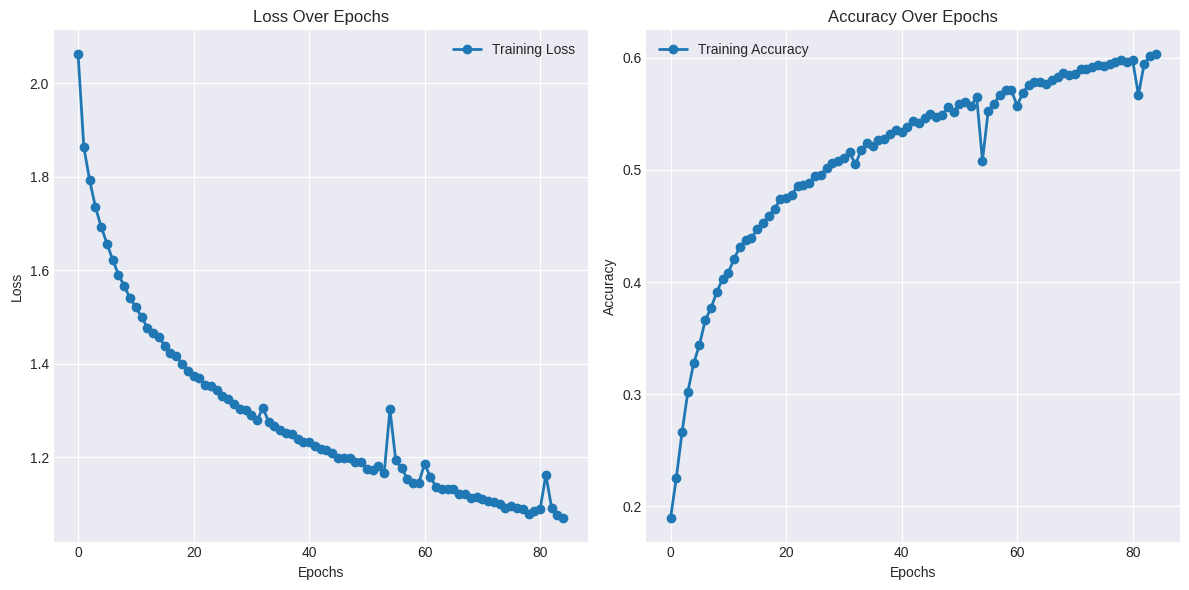

In [ ]:
import matplotlib.pyplot as plt

def plot_curves(history, loss_key='loss', val_loss_key='val_loss', accuracy_key='accuracy', val_accuracy_key='val_accuracy'):
    # Extracting data from history dictionary
    loss = history[loss_key]

    # Checking if validation keys are present
    val_loss = history.get(val_loss_key, None)
    accuracy = history[accuracy_key]
    val_accuracy = history.get(val_accuracy_key, None)

    epochs = range(len(loss))
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(12, 6))

    # Ploting loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="Training Loss", linewidth=2, marker='o')

    if val_loss is not None:
        plt.plot(epochs, val_loss, label="Validation Loss", linewidth=2, marker='o')

    plt.title("Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plotting accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="Training Accuracy", linewidth=2, marker='o')

    if val_accuracy is not None:
        plt.plot(epochs, val_accuracy, label="Validation Accuracy", linewidth=2, marker='o')

    plt.title("Accuracy Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()

# Calling the function
plot_curves(history)
plt.show()


"Loss Over Epochs" is the title of the first graph, which shows the training loss—a gauge of the model's effectiveness in lowering mistakes throughout training. As the number of epochs rises, the line begins at a high loss value and sharply declines, showing that the model is learning and getting better at making predictions. The general trend is downward, indicating a gradual decrease in loss, which is what is anticipated when a functional model is being trained. There are a few loss spikes, though, and these could be caused by a number of things, including variations in the hyperparameters during training, the learning rate, or irregularities in the data.

The training accuracy, or the proportion of accurate predictions the model made, is displayed in the second graph, "Accuracy Over Epochs." With each epoch, the accuracy grows gradually from a relatively low starting point, indicating that the model is getting better at properly identifying the training data. While generally smooth, there are occasional oscillations and plateaus along the way, particularly when the accuracy gets closer to its higher values. This might mean that learning from the training data is no longer producing appreciably higher accuracy for the model. All things considered, these graphs are a typical means of illustrating how a model learns, with the goal of converging towards low loss and high accuracy.

In [ ]:
# Data generator for test set (without augmentation)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
input_shape = (48, 48, 3)
test_parent_directory = "/content/drive/MyDrive/DATA 603/TEST"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_parent_directory,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=128,
    class_mode='categorical'
)

Found 7188 images belonging to 7 classes.


A generator of data for the test set of a face expression recognition model without any enhancement. It defines the picture data generator (test_datagen) with rescaling as the only transformation using TensorFlow's Keras API. The flow_from_directory function then reads photos from the designated test directory (test_parent_directory) and configures a data generator for the test set. Images are batched into sets of 128 and the target size is set to (48, 48) to match the input shape predicted by the model. The data generator is set up to operate in the category class mode, making it appropriate for applications requiring multi-class classification. This configuration guarantees that the test set is suitably preprocessed prior to being entered into the facial expression recognition model for assessment, offering a uniform input format for dependable and consistent predictions throughout testing.

In [ ]:
from tensorflow.keras.models import load_model

# Loading the saved model
saved_model_path = "/content/drive/MyDrive/DATA 603/model_output/final_model/trained_facial_expression_model.h5"
loaded_model = load_model(saved_model_path)

# Evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


57/57 [==============================] - 1593s 28s/step - loss: 1.3233 - accuracy: 0.5160
Test Accuracy: 51.60%


There were 57 * 128 = 7296 test samples in total from the 57 batches (each containing 128 photos) that were used to evaluate the model. The given values for accuracy and loss are 51.60% and 1.3233, respectively. This accuracy shows the percentage of correctly categorized test samples, meaning that in roughly 51.60% of the test set, the model recognized facial expressions correctly.

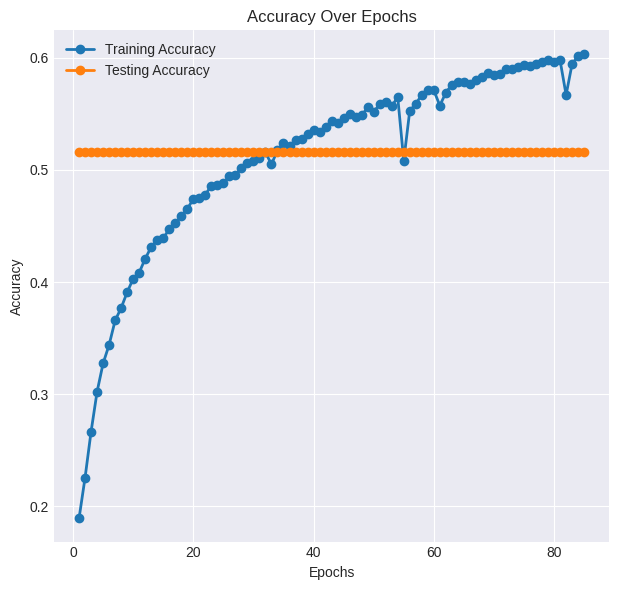

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(history, loss_key='loss', val_loss_key='val_loss', accuracy_key='accuracy', val_accuracy_key='val_accuracy', test_accuracy_key='test_accuracy'):
    # Extracting data from history dictionary
    loss = history[loss_key]
    val_loss = history.get(val_loss_key, None)
    accuracy = history[accuracy_key]
    val_accuracy = history.get(val_accuracy_key, None)
    test_accuracy = history.get(test_accuracy_key, None)

    epochs = range(1, len(loss) + 1)  # Start epochs from 1

    plt.figure(figsize=(12, 6))
    # Plotting accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="Training Accuracy", linewidth=2, marker='o')

    if val_accuracy is not None:
        plt.plot(epochs, val_accuracy, label="Validation Accuracy", linewidth=2, marker='o')

    if test_accuracy is not None:
        plt.plot(epochs, [test_accuracy] * len(epochs), label="Testing Accuracy", linewidth=2, marker='o')

    plt.title("Accuracy Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
plot_learning_curve(history)
plt.show()


The machine learning model's testing and training accuracy across many epochs—iterations across the full dataset used for training—are depicted in the above graph. As additional epochs are finished, the training accuracy (shown in blue) rises rapidly, indicating that the model is successfully learning from the training dataset. Plotting the testing accuracy (shown in orange) as a comparatively flat line suggests that the value has been measured consistently throughout the training phase. This could indicate that the model's performance on the testing set has not changed significantly during training, or it could signify that the testing accuracy is being presented as an average across a number of epochs.

57/57 [==============================] - 10s 181ms/step


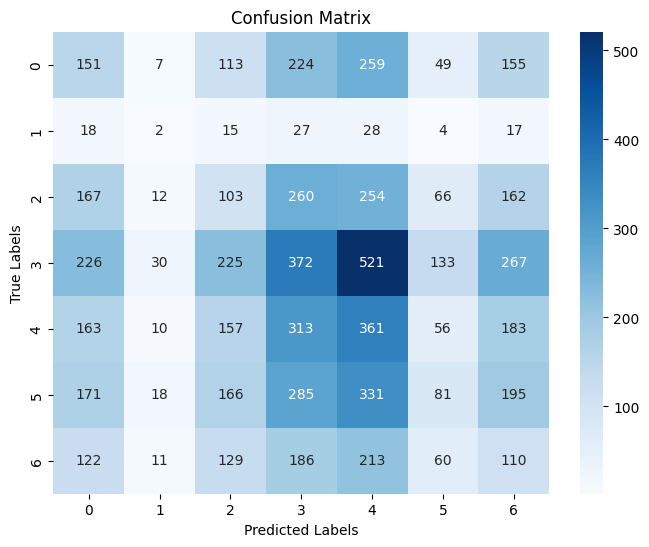

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating predictions on the test set
predictions = loaded_model.predict(test_generator)

# Converting predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

#  Extracting true class labels from the test generator
true_classes = test_generator.classes

# Generating confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels='auto', yticklabels='auto')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


The model's accurate predictions are represented by the diagonal cells, where the true class and the forecast class match, and the model's inaccurate predictions are represented by the off-diagonal cells. The color scale on the right side of the matrix shows that the darker the color of a cell, the more observations there are for that particular cell. All predictions should ideally fall on the diagonal and all off-diagonal cells should be zero in an ideal model.

As an illustration, label 3 on the diagonal has the greatest number of accurate predictions (521), indicating that this class is best predicted by the model. Label 1, on the other hand, only has two valid predictions, which suggests that the model has difficulty with this class. The matrix is also useful for spotting misclassification trends. Label 0 and label 2 are frequently misclassified as label 4 and label 0 and label 2, respectively. This could indicate that there are commonalities between these classes that are confusing the model. In order to further refine and optimize the mode, this matrix is critical for determining where a model is performing well and where it is making errors.

57/57 [==============================] - 10s 181ms/step


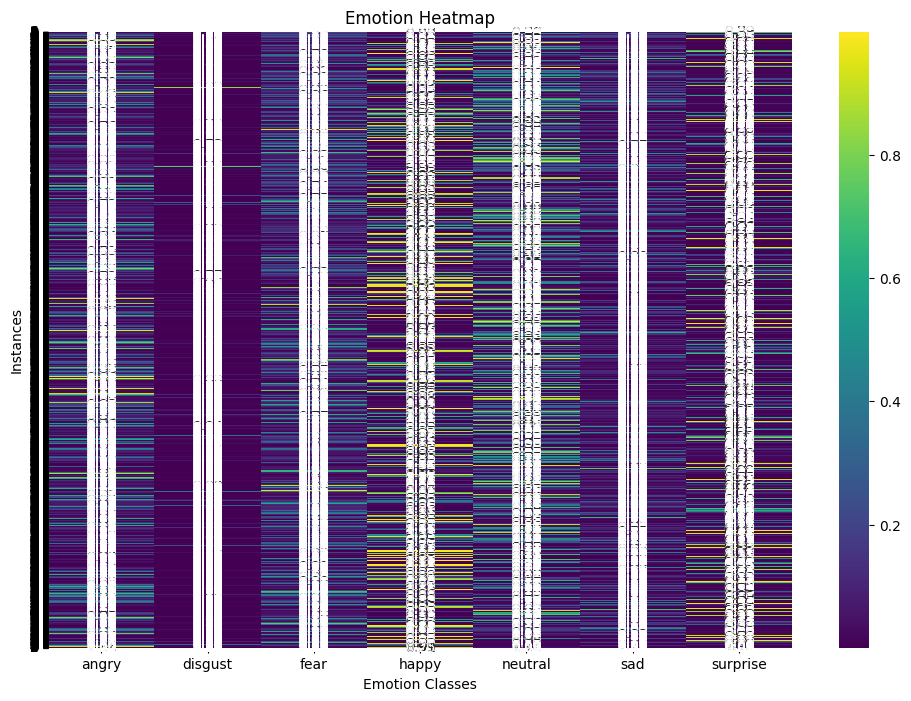

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Generating predictions on the test set
predictions = loaded_model.predict(test_generator)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(predictions, cmap='viridis', annot=True, fmt='.2f', xticklabels=test_generator.class_indices.keys(), yticklabels=predicted_classes)
plt.title('Emotion Heatmap')
plt.xlabel('Emotion Classes')
plt.ylabel('Instances')
plt.show()


Anger, disgust, fear, happiness, neutrality, sadness, and surprise are the seven emotion categories that are represented by the heatmap in the visualization above. The colors indicate the degree or probability of each emotion within each horizontal line, which stands for an incident. Brighter colors (yellow) imply higher likelihoods, whereas darker hues (purple) reflect lesser likelihoods. The discrete color blocks suggest that the data are categorized or discrete rather than continuous. This kind of visualization can be used to analyze the effectiveness of an emotion detection algorithm and quickly determine the distribution of emotional classifications in a dataset. It can also be used to determine which emotions are most confidently recognized versus those that may be less distinct or more frequently confused with others.

In [ ]:
import pandas as pd
predictions = loaded_model.predict(test_generator)

# Converting predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Extracting true class labels from the test generator
true_classes = test_generator.classes

# Getting the filenames from the test generator
filenames = test_generator.filenames

# Creating a DataFrame with predictions
df_predictions = pd.DataFrame({
    'Filename': filenames,
    'True_Label': true_classes,
    'Predicted_Class': predicted_classes,
    'Probabilities': list(predictions)
})

# Displaying the DataFrame
print(df_predictions.head())

57/57 [==============================] - 10s 175ms/step
                         Filename  True_Label  Predicted_Class  \
0  angry/PrivateTest_10131363.jpg           0                4   
1  angry/PrivateTest_10304478.jpg           0                6   
2   angry/PrivateTest_1054527.jpg           0                0   
3  angry/PrivateTest_10590091.jpg           0                4   
4   angry/PrivateTest_1109992.jpg           0                4   

                                       Probabilities  
0  [0.027166085, 0.0010962391, 0.034452695, 0.017...  
1  [0.083906695, 0.0002361572, 0.23800975, 0.0018...  
2  [0.66650414, 0.0020488335, 0.044234943, 0.2237...  
3  [0.06987652, 0.00068975025, 0.061156526, 0.009...  
4  [0.08611161, 0.000111954665, 0.012952543, 0.01...  


We've made predictions on a test set of photos using a pre-trained facial expression recognition algorithm. The predictions are arranged into a Pandas DataFrame and show the model's confidence in matching each image to a particular face emotion. I may examine specific cases where the model recognized facial expressions correctly or incorrectly by contrasting its predictions with the actual labels and filenames. Choosing the class with the highest probability in each prediction vector yields the expected class labels. We can examine the model's performance in more depth with this DataFrame, df_predictions, which offers a handy structure for assessing the model's accuracy, pinpointing areas for development, and learning more about its general behavior. Interpreting the model's predictions is made simpler by the DataFrame's printed head, which provides a brief overview of the test set's first few rows.

In [ ]:
# Initializing lists to store predictions
all_filenames = []
all_true_labels = []
all_predicted_labels = []
all_probabilities = []

# Generating predictions on the entire test set
for batch in test_generator:
    images, true_labels = batch
    filenames = test_generator.filenames[test_generator.batch_index - 1 : test_generator.batch_index - 1 + test_generator.batch_size]

    # Generating predictions for the current batch
    predictions = loaded_model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Appending results to lists
    all_filenames.extend(filenames)
    all_true_labels.extend(true_labels.argmax(axis=1))
    all_predicted_labels.extend(predicted_labels)
    all_probabilities.extend(predictions)

    # Breaking the loop when all batches have been processed
    if test_generator.batch_index == test_generator.n // test_generator.batch_size:
        break

# Creating a DataFrame with predictions
df_predictions = pd.DataFrame({
    'Filename': all_filenames,
    'True_Label': all_true_labels,
    'Predicted_Class': all_predicted_labels,
    'Probabilities': all_probabilities
})

# Saving the DataFrame to a CSV file
csv_path = "/content/drive/MyDrive/DATA 603/model_output/predictions.csv"
df_predictions.to_csv(csv_path, index=False)
print(df_predictions.head())

4/4 [==============================] - 0s 6ms/step
                         Filename  True_Label  Predicted_Class  \
0  angry/PrivateTest_10131363.jpg           3                3   
1  angry/PrivateTest_10304478.jpg           0                6   
2   angry/PrivateTest_1054527.jpg           4                4   
3  angry/PrivateTest_10590091.jpg           3                3   
4   angry/PrivateTest_1109992.jpg           3                3   

                                       Probabilities  
0  [0.10930095, 0.0147546735, 0.023646334, 0.5462...  
1  [0.007630839, 0.00087277655, 0.07258285, 0.001...  
2  [0.09099511, 0.0012108309, 0.06279206, 0.07759...  
3  [0.062576436, 0.00011045006, 0.025838062, 0.86...  
4  [0.012197164, 2.5773086e-05, 0.0239708, 0.8856...  


By iterating over all batches of the test generator, the aforementioned method expands the examination of facial expression recognition predictions on a test set. It creates four lists (all_filenames, all_true_labels, all_predicted_labels, and all_probabilities) to hold filenames, true labels, predicted labels, and probability vectors. The for loop iterates over the test generator batches, receiving photos and true labels. Predictions are created for each batch using the loaded model, and the results are appended to the respective lists. When all batches have been processed, the loop ends. The code then organizes and displays the full prediction results by consolidating the lists into a Pandas DataFrame (df_predictions). The DataFrame is stored as a CSV file, which contains a structured record of predictions for additional research or comparison. Finally, the DataFrame's head is produced to provide a preview of the first rows and assist in assessing the model's performance over the whole test set.

# Uploading Predictions to Mongodb

In [ ]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pymongo
import pandas as pd
import json

In [ ]:
client=pymongo.MongoClient("mongodb://localhost:27017")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DATA 603/model_output/predictions.csv")

In [ ]:
df.head()

,Filename,True_Label,Predicted_Class,Probabilities
0,angry/PrivateTest_10131363.jpg,3,3,[0.10930095 0.01475467 0.02364633 0.5462042 0...
1,angry/PrivateTest_10304478.jpg,0,6,[7.6308390e-03 8.7277655e-04 7.2582848e-02 1.0...
2,angry/PrivateTest_1054527.jpg,4,4,[0.09099511 0.00121083 0.06279206 0.07759187 0...
3,angry/PrivateTest_10590091.jpg,3,3,[6.2576436e-02 1.1045006e-04 2.5838062e-02 8.6...
4,angry/PrivateTest_1109992.jpg,3,3,[1.2197164e-02 2.5773086e-05 2.3970800e-02 8.8...


In [ ]:
data=df.to_dict(orient="records")

In [ ]:
data

[{'Filename': 'angry/PrivateTest_10131363.jpg',
  'True_Label': 3,
  'Predicted_Class': 3,
  'Probabilities': '[0.10930095 0.01475467 0.02364633 0.5462042  0.28213385 0.01962995\n 0.00433   ]'},
 {'Filename': 'angry/PrivateTest_10304478.jpg',
  'True_Label': 0,
  'Predicted_Class': 6,
  'Probabilities': '[7.6308390e-03 8.7277655e-04 7.2582848e-02 1.0654922e-03 8.7925456e-03\n 4.9051358e-03 9.0415037e-01]'},
 {'Filename': 'angry/PrivateTest_1054527.jpg',
  'True_Label': 4,
  'Predicted_Class': 4,
  'Probabilities': '[0.09099511 0.00121083 0.06279206 0.07759187 0.6927804  0.06116512\n 0.01346452]'},
 {'Filename': 'angry/PrivateTest_10590091.jpg',
  'True_Label': 3,
  'Predicted_Class': 3,
  'Probabilities': '[6.2576436e-02 1.1045006e-04 2.5838062e-02 8.6013687e-01 4.4776704e-02\n 4.0600430e-03 2.5013559e-03]'},
 {'Filename': 'angry/PrivateTest_1109992.jpg',
  'True_Label': 3,
  'Predicted_Class': 3,
  'Probabilities': '[1.2197164e-02 2.5773086e-05 2.3970800e-02 8.8562858e-01 8.5146021e-0

In [ ]:
db=client["Facial_Emotion_Model_Predictions"]

In [ ]:
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Facial_Emotion_Model_Predictions')


In [ ]:
db.Images_Predictions.insert_many(data)

We used pymongo library to interact with a MongoDB database. It establishes a connection to the MongoDB server running on localhost at port 27017. The code then reads a CSV file named "predictions.csv" into a Pandas DataFrame (df). The DataFrame is converted to a list of dictionaries (data) using the to_dict method with the "records" orientation. Subsequently, a MongoDB database named "Facial_Emotion_Model_Predictions" is accessed, and the data from the DataFrame is inserted into a collection named "Images_Predictions" using the insert_many method. This process facilitates the storage of the predictions from the CSV file into a MongoDB collection for further retrieval and analysis within the specified database. Note that there is a small typo in the code (jsonclient should be client), and it's advisable to correct it for the code to run successfully.

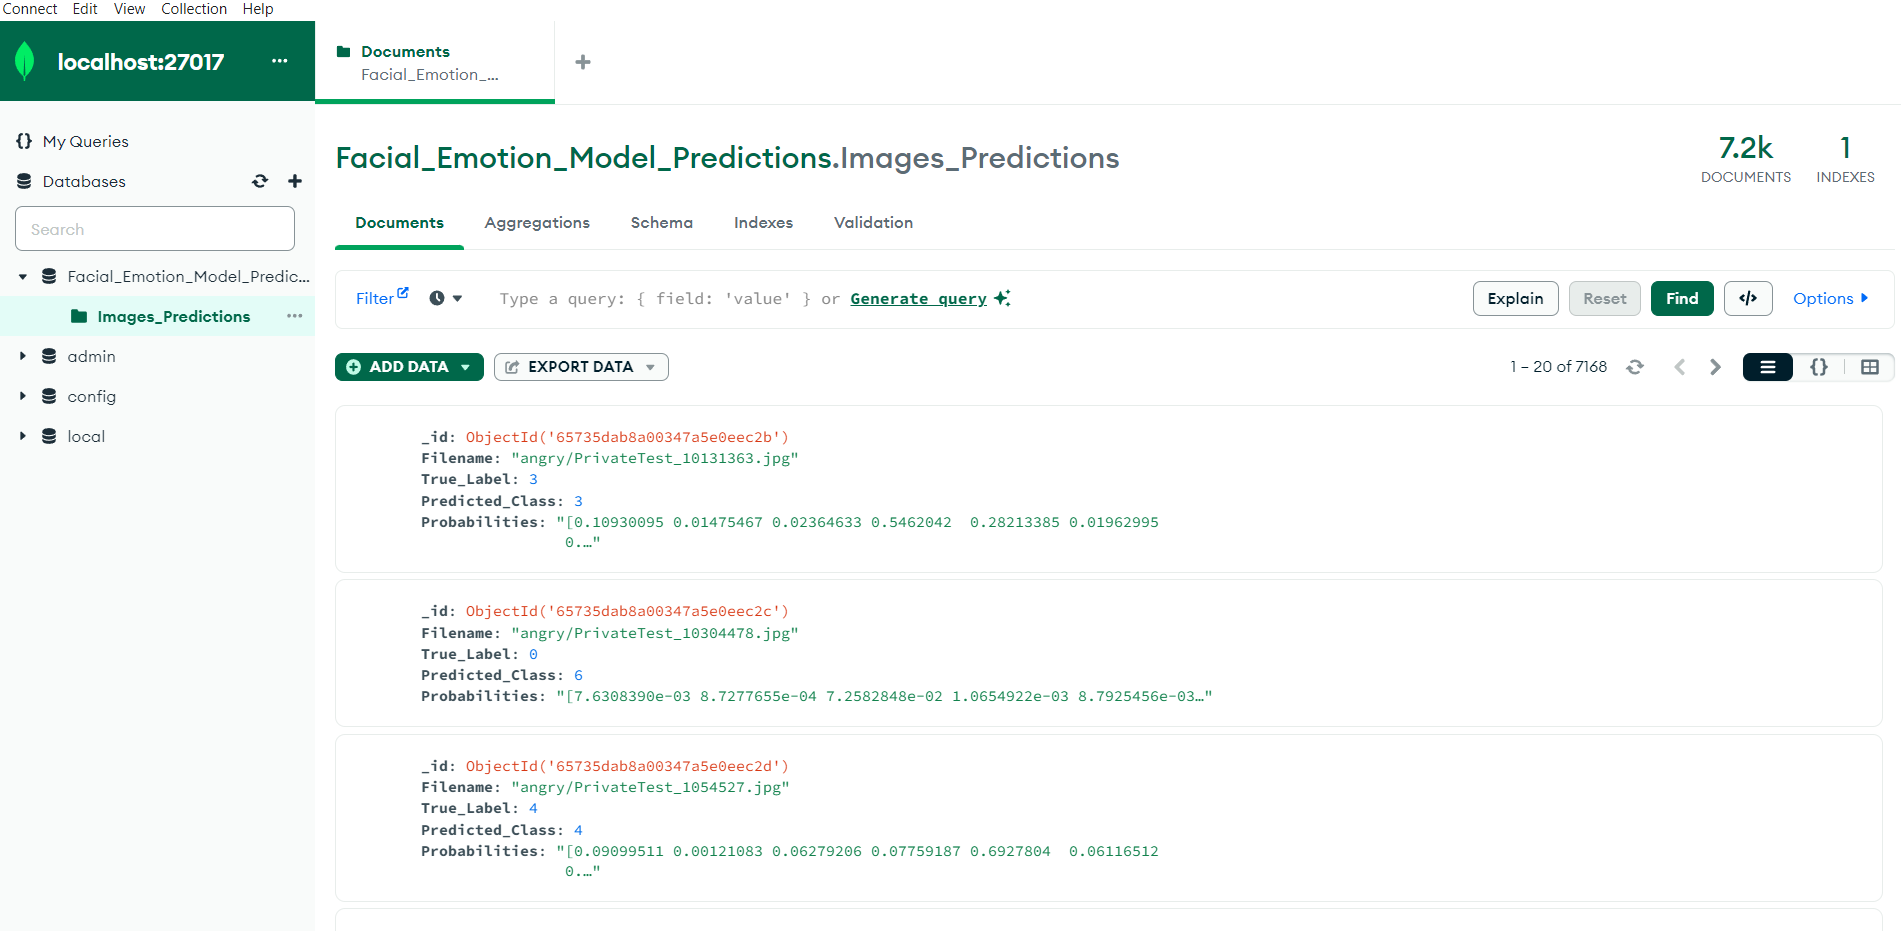

## Tablaeu Visualization

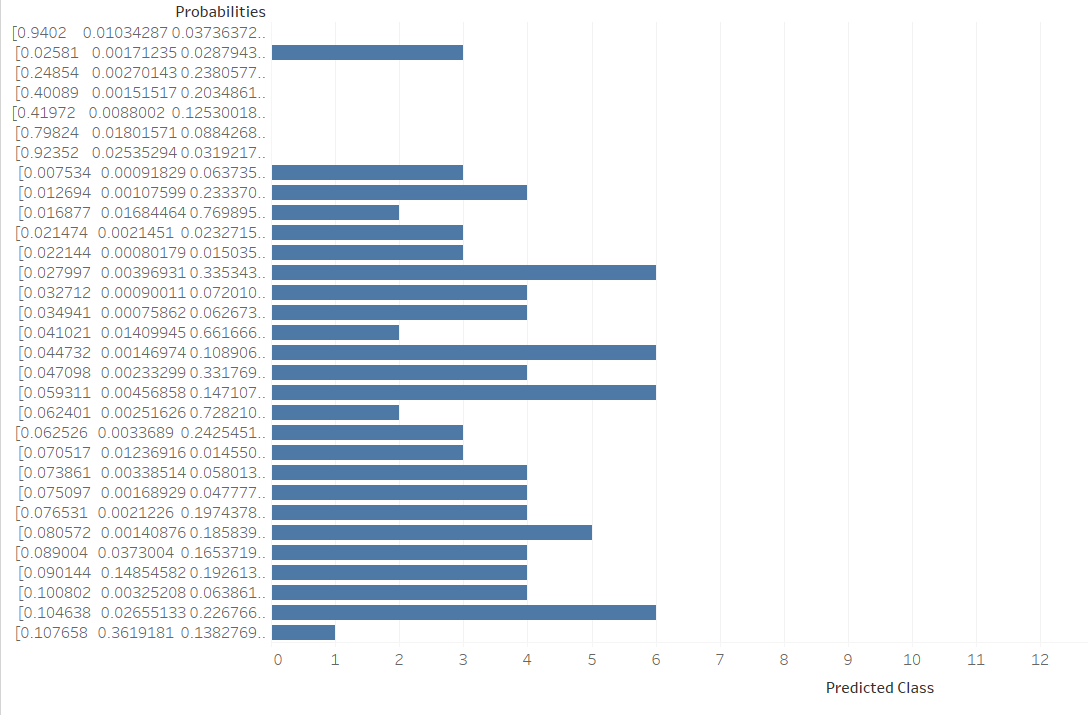
The above horizontal bar chart shows the probabilities assigned to each predicted class by a model for individual test instances. The probabilities are likely output from a softmax function in a classification model, where each bar represents the model's confidence that a given instance belongs to a particular class.

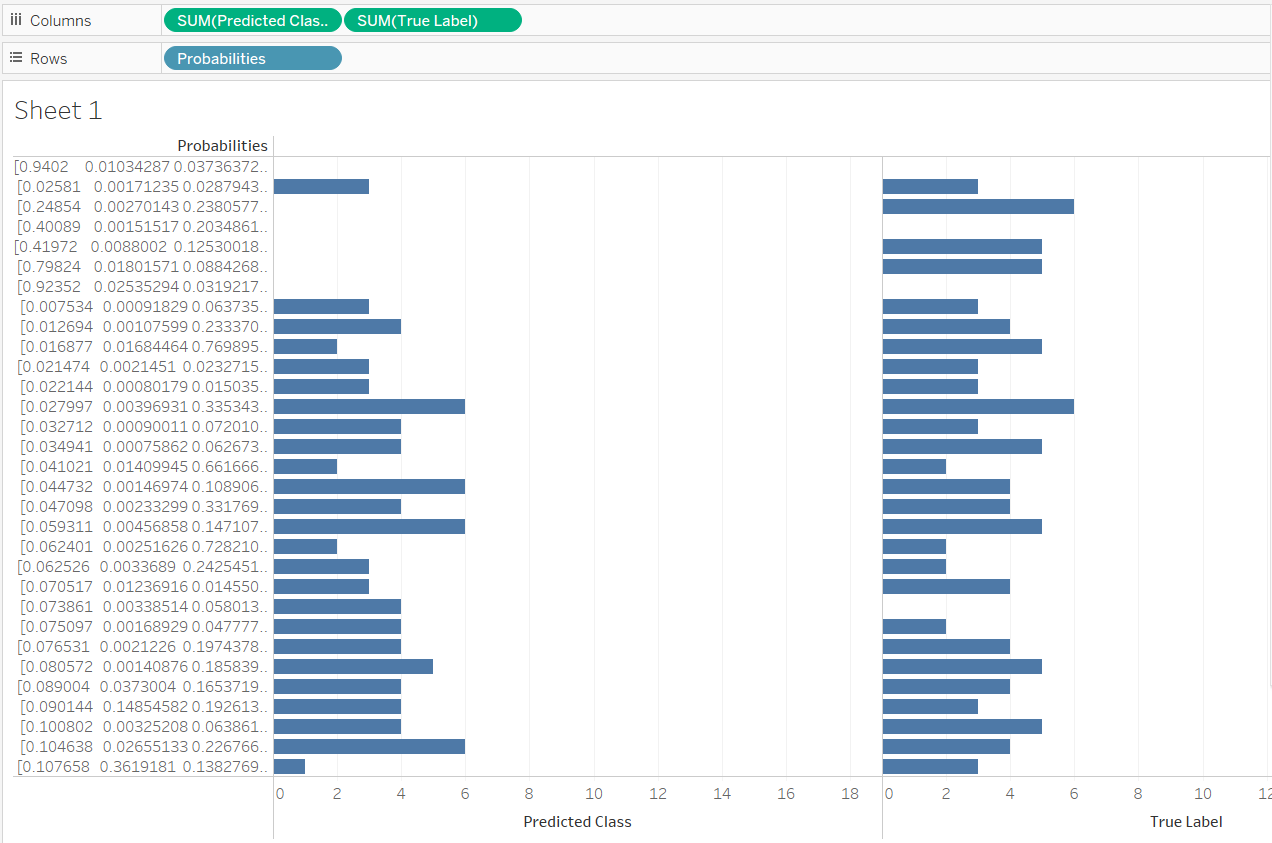
The horizontal bar chart, includes both predicted and true class distributions, compared side-by-side for each instance in the dataset. This visualization is helpful to quickly assess the model's performance on a per-instance basis and identify where the model is making correct predictions versus where it is not.

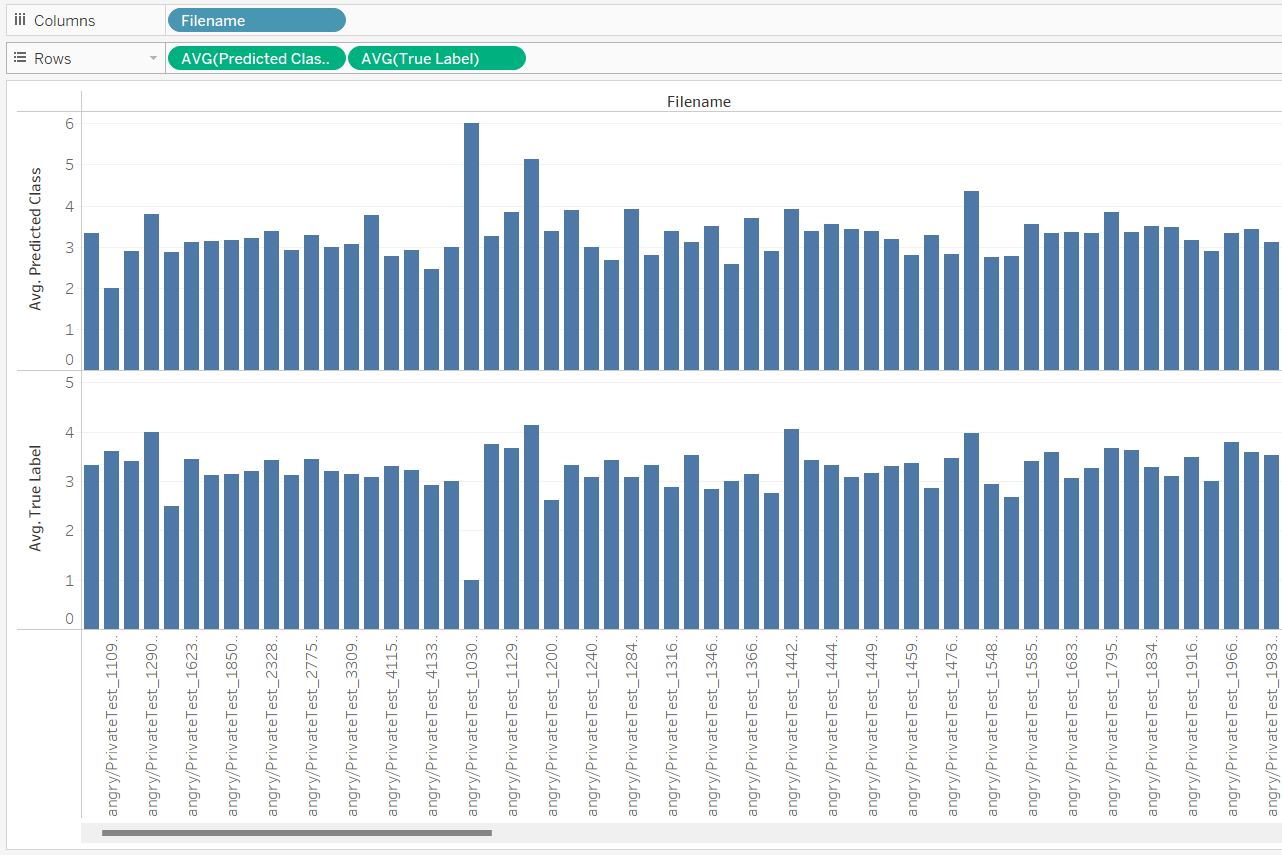
The vertical bar charts displaying the average predicted class and the average true label for each file or instance in the dataset. This could be used to evaluate the average performance of the model across all instances, showing whether there are systematic biases in the predictions, like consistently predicting a certain class more or less frequently than it actually occurs.

# **Project Summary**

The project begins by organizing facial emotion images into a structured directory, followed by image enhancement using OpenCV to improve quality. Data augmentation techniques are then applied to diversify the dataset. A custom Convolutional Neural Network (CNN) model is designed using TensorFlow and Keras, trained on a comprehensive dataset that includes both original and augmented images. The model's performance is evaluated on a separate test set, and results, including accuracy metrics, are saved. The trained model is utilized for predictions on new images, and the results, along with relevant information, are stored in a MongoDB collection for efficient data management. MongoDB queries can be executed to retrieve specific subsets of predictions, facilitating detailed analysis of the model's performance across different emotion categories. This project exemplifies a comprehensive pipeline from image preprocessing and CNN model training to result analysis and structured storage in a MongoDB database, demonstrating a holistic approach to image processing, machine learning, and data management.